In [27]:
import argparse
import pysam
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
import scipy.stats as stats
import os
import pandas as pd

In [12]:
#add the CHANGE seq beds
alt7_taylor = 'alt7_taylor.bed'
rex4_taylor = 'rex4_taylor.bed'
rexc_taylor = 'rexc_taylor.bed'
altc_taylor = 'altc_taylor.bed'

#the cas offinder beds 
alt7_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_alt7_4mismatches.bed'
rex4_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_rex4_4mismatches.bed'
rexc_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_rexc_4mismatches.bed'
altc_cof =  Path('small_bams_again') / 'beds' / 'casoffinder_beds' / 'casoffinder_altc_4mismatches.bed'


altc = Path('small_bams_again') / 'beds' / 'altc_lifted.bed'
alt7 = Path('small_bams_again') / 'beds' / 'alt7_lifted.bed'
rex4 = Path('small_bams_again') / 'beds' / 'rex4_lifted.bed'
rexc = Path('small_bams_again') / 'beds' / 'rexc_lifted.bed'

altc = 'altc_taylor.bed'
alt7 = 'alt7_taylor.bed'
rex4 = 'rex4_taylor.bed'
rexc = 'rexc_taylor.bed'

#read in the tsvs
all_tsvs = {'ALTC':pd.read_csv(altc, sep='\t',  names=['chrom','start','end','na','na2','REGION']),  
    'ALT7':pd.read_csv(alt7, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REX4':pd.read_csv(rex4, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REXC':pd.read_csv(rexc, sep='\t',  names=['chrom','start','end','na','na2','REGION'])}


all_tsvs_cof = {'ALTC':pd.read_csv(altc_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),  
    'ALT7':pd.read_csv(alt7_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REX4':pd.read_csv(rex4_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION']),
                'REXC':pd.read_csv(rexc_cof, sep='\t',  names=['chrom','start','end','na','na2','REGION'])}



edited_dfs = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}


edited_dfs_cof = {'ALTC': [None, None],'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

comp_dfs_cof = {'ALTC': [None, None], 
            'ALT7': [None, None],
      'REXC': [None, None],
      'REX4':[None, None]}

control_dfs_cof = {'ALTC': [None, None],
               'ALT7': None,
      'REXC': None,
      'REX4': None}


#these are the cassofinder csvs
for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}again_casoffinder_new_concatanted_taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs_cof[condition][replicate] = pd.read_csv(file_path)
        edited_dfs_cof[condition][replicate]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
        edited_dfs_cof[condition][replicate]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
        edited_dfs_cof[condition][replicate]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()
        
for condition in all_tsvs:
    file_path = f"{condition}again_casoffinder_new_concatanted_taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs_cof[condition] = pd.read_csv(file_path)
    control_dfs_cof[condition]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
    control_dfs_cof[condition]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
    control_dfs_cof[condition]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()

for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"casoffinder_{condition}{replicate}_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        comp_dfs_cof[condition][replicate] = pd.read_csv(file_path)
        comp_dfs_cof[condition][replicate]['chrom_orig'] = all_tsvs_cof[condition]['chrom'].to_list()
        comp_dfs_cof[condition][replicate]['start_orig'] = all_tsvs_cof[condition]['start'].to_list()
        comp_dfs_cof[condition][replicate]['end_orig'] = all_tsvs_cof[condition]['end'].to_list()

#these are the normal ones
for condition in all_tsvs:
    for replicate in  np.arange(0,2):
        file_path = f"{condition}again_new_concatanted_taylor_consensus_indel_rates_hg38{replicate}.csv"  # Construct file name
        edited_dfs[condition][replicate] = pd.read_csv(file_path)
        edited_dfs[condition][replicate]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
        edited_dfs[condition][replicate]['start_orig'] = all_tsvs[condition]['start'].to_list()
        edited_dfs[condition][replicate]['end_orig'] = all_tsvs[condition]['end'].to_list()

for condition in all_tsvs:
    file_path = f"{condition}again_new_concatanted_taylor_consensus_indel_rates_control_hg38.csv"  # Using f-string for readability
    control_dfs[condition] = pd.read_csv(file_path)
    control_dfs[condition]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
    control_dfs[condition]['start_orig'] = all_tsvs[condition]['start'].to_list()
    control_dfs[condition]['end_orig'] = all_tsvs[condition]['end'].to_list()

for condition in all_tsvs:
    for replicate in np.arange(0,2):
        file_path = f"change_seq_{condition}{replicate}_taylor_consensus_comparison_hg38.csv"  # Using f-string for readability
        print(file_path)
        comp_dfs[condition][replicate] = pd.read_csv(file_path)
        comp_dfs[condition][replicate]['chrom_orig'] = all_tsvs[condition]['chrom'].to_list()
        comp_dfs[condition][replicate]['start_orig'] = all_tsvs[condition]['start'].to_list()
        comp_dfs[condition][replicate]['end_orig'] = all_tsvs[condition]['end'].to_list()


change_seq_ALTC0_taylor_consensus_comparison_hg38.csv
change_seq_ALTC1_taylor_consensus_comparison_hg38.csv
change_seq_ALT70_taylor_consensus_comparison_hg38.csv
change_seq_ALT71_taylor_consensus_comparison_hg38.csv
change_seq_REX40_taylor_consensus_comparison_hg38.csv
change_seq_REX41_taylor_consensus_comparison_hg38.csv
change_seq_REXC0_taylor_consensus_comparison_hg38.csv
change_seq_REXC1_taylor_consensus_comparison_hg38.csv


In [13]:
from scipy.stats import combine_pvalues
comp_dfs['ALTC'][0]

#combine the graphs
for condition in all_tsvs.keys():
    print(comp_dfs[condition][0].columns)
    comp_dfs_cof[condition][0]['total wt reads rep2'] = comp_dfs_cof[condition][1]['total wt reads'] 
    comp_dfs_cof[condition][0]['total edited reads rep2'] = comp_dfs_cof[condition][1]['total edited reads'] 
    comp_dfs_cof[condition][0]['edited reads with indels rep2'] = comp_dfs_cof[condition][1]['edited reads with indels '] 
    comp_dfs_cof[condition][0]['wt reads with indels rep2'] = comp_dfs_cof[condition][1]['wt reads with indels'] 
    comp_dfs_cof[condition][0]['edited indel % rep2'] = comp_dfs_cof[condition][1]['edited indel %']
    comp_dfs_cof[condition][0]['wt indel % rep2'] = comp_dfs_cof[condition][1]['wt indel %'] 
    comp_dfs_cof[condition][0]['indel p-value rep2'] = comp_dfs_cof[condition][1]['indel p-value'] 

    #use combine_pvalues to combine two p-values that result from a fisher test
    combined_pvals = []
    for p1, p2 in zip(comp_dfs_cof[condition][0]['indel p-value'], comp_dfs_cof[condition][0]['indel p-value rep2']):
        stat, p_combined = combine_pvalues([p1, p2], method='fisher')
        combined_pvals.append(p_combined)

    #combine the p-values 
    comp_dfs_cof[condition][0]['fishers combined indel p-value'] = combined_pvals

    comp_dfs_cof[condition][0]['combined_edited_reads'] = comp_dfs_cof[condition][0]['total edited reads'] + comp_dfs_cof[condition][1]['total edited reads']
    comp_dfs_cof[condition][0]['combined_wt_reads'] = comp_dfs_cof[condition][0]['total wt reads'] + comp_dfs_cof[condition][1]['total wt reads']
    comp_dfs_cof[condition][0]['combined_edited_reads_w_indels'] = comp_dfs_cof[condition][0]['edited reads with indels '] + comp_dfs_cof[condition][1]['edited reads with indels ']
    comp_dfs_cof[condition][0]['combined_wt_reads_w_indels'] = comp_dfs_cof[condition][0]['wt reads with indels'] + comp_dfs_cof[condition][1]['wt reads with indels']
    comp_dfs_cof[condition][0]['combined edited indel %'] = comp_dfs_cof[condition][0]['combined_edited_reads_w_indels'] / comp_dfs_cof[condition][0]['combined_edited_reads']
    comp_dfs_cof[condition][0]['combined wt indel %'] = comp_dfs_cof[condition][0]['combined_wt_reads_w_indels'] / comp_dfs_cof[condition][0]['combined_wt_reads']

    #a different way of combining based off total reads - not used in final csv table
    comp_dfs_cof[condition][0]['fishers combined indel %'] = comp_dfs_cof[condition][0]['combined_wt_reads_w_indels'] / comp_dfs_cof[condition][0]['combined_wt_reads']


    #iterate through the rows in the comparison table and preform the fishers exact test on the combined data (not used in final csv)
    for index, row in comp_dfs_cof[condition][0].iterrows():
        region = row['REGION']
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
                      int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]
        
        cont['edited'] = [int(row['combined_edited_reads_w_indels']),
                      int(row['combined_edited_reads']) - int(row['combined_edited_reads_w_indels'])]

        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)
        comp_dfs_cof[condition][0].loc[comp_dfs_cof[condition][0]['REGION'] == region, 'combined indel p-value'] = p_value


#recreating the p-value calculation now that we include all locations
for condition in all_tsvs.keys():   
    comp_dfs[condition][0]['total wt reads rep2'] = comp_dfs[condition][1]['total wt reads'] 
    comp_dfs[condition][0]['total edited reads rep2'] = comp_dfs[condition][1]['total edited reads'] 
    comp_dfs[condition][0]['edited reads with indels rep2'] = comp_dfs[condition][1]['edited reads with indels '] 
    comp_dfs[condition][0]['wt reads with indels rep2'] = comp_dfs[condition][1]['wt reads with indels'] 
    comp_dfs[condition][0]['edited indel % rep2'] = comp_dfs[condition][1]['edited indel %'] 
    comp_dfs[condition][0]['indel p-value rep2'] = comp_dfs[condition][1]['indel p-value'] 
    comp_dfs[condition][0]['wt indel % rep2'] = comp_dfs[condition][1]['wt indel %'] 

    comp_dfs[condition][0]['combined_edited_reads'] = comp_dfs[condition][0]['total edited reads'] + comp_dfs[condition][1]['total edited reads']
    comp_dfs[condition][0]['combined_wt_reads'] = comp_dfs[condition][0]['total wt reads'] + comp_dfs[condition][1]['total wt reads']
    comp_dfs[condition][0]['combined_edited_reads_w_indels'] = comp_dfs[condition][0]['edited reads with indels '] + comp_dfs[condition][1]['edited reads with indels ']
    comp_dfs[condition][0]['combined_wt_reads_w_indels'] = comp_dfs[condition][0]['wt reads with indels'] + comp_dfs[condition][1]['wt reads with indels']
    comp_dfs[condition][0]['combined edited indel %'] = comp_dfs[condition][0]['combined_edited_reads_w_indels'] / comp_dfs[condition][0]['combined_edited_reads']
    comp_dfs[condition][0]['combined wt indel %'] = comp_dfs[condition][0]['combined_wt_reads_w_indels'] / comp_dfs[condition][0]['combined_wt_reads']

    combined_pvals = []
    for p1, p2 in zip(comp_dfs[condition][0]['indel p-value'], comp_dfs[condition][0]['indel p-value rep2']):
        stat, p_combined = combine_pvalues([p1, p2], method='fisher')
        combined_pvals.append(p_combined)
        
    comp_dfs[condition][0]['fishers combined indel p-value'] = combined_pvals
    
    #calculates the p-value for each of the rows
    for index, row in comp_dfs[condition][0].iterrows():
        region = row['REGION']
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
                      int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]
        
        cont['edited'] = [int(row['combined_edited_reads_w_indels']),
                      int(row['combined_edited_reads']) - int(row['combined_edited_reads_w_indels'])]

        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)
        comp_dfs[condition][0].loc[comp_dfs[condition][0]['REGION'] == region, 'combined indel p-value'] = p_value


Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt reads',
       'edited reads with indels ', 'wt reads with indels', 'indel p-value',
       'trial', 'chrom_orig', 'start_orig', 'end_orig'],
      dtype='object')
Index(['Unnamed: 0', 'REGION', 'chrom', 'start', 'end', 'edited indel %',
       'wt indel %', 'total edited reads', 'total wt 

In [14]:
#add a row for the new table
def construct_comp_tbl(wt, edited):
    comp_df = pd.DataFrame([])

    # Ensure 'REGION' column is included
    comp_df['REGION'] = wt['REGION'].tolist()
    
    #construct a contigency table
    for index, row in wt.iterrows():
        cont = pd.DataFrame([])
        cont_indel = pd.DataFrame([])
        
        region = row['REGION']
        cont['wt'] = [int(row['combined_wt_reads_w_indels']),
        int(row['combined_wt_reads']) - int(row['combined_wt_reads_w_indels'])]

        row2 = edited.iloc[index]
        cont['edited'] = [int(row2['combined_edited_reads_w_indels']),
        int(row2['combined_edited_reads']) - int(row2['combined_edited_reads_w_indels'])]
        
        cont['type'] = ['indel', 'no indel']
        cont.set_index('type', inplace=True)
        odds_ratio, p_value = stats.fisher_exact(cont)

        comp_df.loc[comp_df['REGION'] == region, 'chrom'] = row['chrom']
        comp_df.loc[comp_df['REGION'] == region, 'start'] = row2['start']
        comp_df.loc[comp_df['REGION'] == region, 'end'] = row['end']
        comp_df.loc[comp_df['REGION'] == region, 'combined indel p-value'] = p_value
        
    return comp_df

In [15]:
#understand the unique positions
for condition in comp_dfs:
    for replicate in np.arange(0,1):
        print(comp_dfs[condition][replicate]['chrom'].unique())

for condition in comp_dfs_cof:
    for replicate in np.arange(0,1):
        print(comp_dfs_cof[condition][replicate]['chrom'].unique())

['chr3' 'chr4' 'chrX' 'chr1' 'chr7' 'chr12' 'chr17' 'chr13' 'chr15' 'chr5'
 'chr8' 'chr9' 'chr20' 'chr16' 'chr10' 'chr2' 'chr14' 'chr21' 'chr18'
 'chr11' 'chr6' 'chr19' 'chr22']
['chr8' 'chr1' 'chr7' 'chr6' 'chr18' 'chr14' 'chr16' 'chr9' 'chr5' 'chr10'
 'chr11' 'chr2' 'chr12' 'chr3' 'chr17' 'chrX' 'chr15' 'chr4' 'chr22'
 'chr20' 'chr13' 'chr21' 'chr19']
['chr1' 'chr15' 'chr16' 'chr5' 'chr19' 'chr3' 'chr14' 'chr22' 'chr9'
 'chr10' 'chr18' 'chr4' 'chr8' 'chr11' 'chr2' 'chr21' 'chr6' 'chrX'
 'chr20' 'chr12' 'chr17' 'chr7' 'chr13']
['chr11' 'chr21' 'chr5' 'chr20' 'chr1' 'chr8' 'chr7' 'chr6' 'chr9' 'chr16'
 'chr18' 'chr19' 'chr4' 'chr3' 'chrX' 'chr17' 'chr15' 'chr10' 'chr2'
 'chr12' 'chr22' 'chr14' 'chr13']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12' 'chr4'
 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6' 'chrY' 'chr11' 'chr10'
 'chr13' 'chr3']
['chr8' 'chr15' 'chr5' 'chr20' 'chr1' 'chr22' 'chr7' 'chr2' 'chr12'
 'chr21' 'chr4' 'chr17' 'chr16' 'chr9' 'chrX' 'chr14' 'chr6

In [30]:
from statsmodels.stats.multitest import multipletests

#combine the two tables
for condition in all_tsvs:
    for replicate in range(1):  # Iterate through two replicates (0 and 1)
        comp_dfs_cof[condition][replicate]['category'] = 'Cas-OFFinder'
        comp_dfs[condition][replicate]['category'] = 'CHANGE-seq'
        comp_dfs[condition][replicate]=pd.concat([comp_dfs_cof[condition][replicate],comp_dfs[condition][replicate]])


#aggregate the 
for condition in ['ALT7', 'ALTC', 'REXC', 'REX4']:
    for replicate in [0, 1]:
        df = comp_dfs[condition][replicate]

        agg_dict = {}
        for col in df.columns:
            if col == 'start':
                continue  # grouping column
            elif col == 'category':
                # Join all category values (as strings)
                agg_dict[col] = lambda x: ' and '.join(x.astype(str))
            else:
                # Take the first value for any other column
                agg_dict[col] = 'first'

        comp_dfs[condition][replicate] = df.groupby('start').agg(agg_dict).reset_index()

for condition in all_tsvs:
    for replicate in range(0,1):  
        # Get the raw p-values for the current replicate and condition
        raw_p_values = comp_dfs[condition][replicate]['indel p-value']
        combined_raw_p_values = comp_dfs[condition][replicate]['combined indel p-value']

        # Combine based off fishers combined p-value calculation
        fishers_combined_raw_p_values = comp_dfs[condition][replicate]['fishers combined indel p-value']
        
        # apply Benjamini-Hochberg correction (FDR control) to the fishers combined p-value
        reject, fisher_adjusted_p_values, _, _ = multipletests(fishers_combined_raw_p_values, alpha=0.05, method='fdr_bh')
        
        # Apply Benjamini-Hochberg correction (FDR control)
        reject, adjusted_p_values, _, _ = multipletests(combined_raw_p_values, alpha=0.05, method='fdr_bh')
        combined_reject, combined_adjusted_p_values, combined_, combined_ = multipletests(combined_raw_p_values, alpha=0.05, method='fdr_bh')
        
        # Add the adjusted p-values back into the DataFrame (not used)
        comp_dfs[condition][replicate]['adjusted_raw_p_values'] = adjusted_p_values
        comp_dfs[condition][replicate]['combined adjusted indel p-value'] = combined_adjusted_p_values

        #final p-value metric to use
        comp_dfs[condition][replicate]['fishers p-values adjusted with benjamini-hochberg'] = fisher_adjusted_p_values


for condition in ['ALT7', 'ALTC', 'REXC', 'REX4']:
    for replicate in [0, 1]:
        comp_dfs[condition][replicate].to_csv(f"{condition}{replicate}_combined_original_new.csv", sep='\t', index=False)



In [17]:
comp_dfs['ALTC'][0]['category'].unique()

array(['Cas-OFFinder', 'CHANGE-seq', 'Cas-OFFinder and CHANGE-seq'],
      dtype=object)

In [18]:
min(comp_dfs['ALTC'][0]['fishers combined indel p-value']) #correct
min(multipletests(comp_dfs['ALTC'][0]['fishers combined indel p-value'], alpha=0.05, method='fdr_bh')[1]) #correct
min(comp_dfs['ALTC'][0]['fishers p-values adjusted with benjamini-hochberg'].to_list()) #not correct


fishers_combined_raw_p_values = comp_dfs['ALTC'][0]['fishers combined indel p-value']
min(fishers_combined_raw_p_values) #correct
reject, fisher_adjusted_p_values, _, _ = multipletests(fishers_combined_raw_p_values, alpha=0.05, method='fdr_bh')
min(fisher_adjusted_p_values) #correct
min(comp_dfs['ALTC'][0]['fishers combined indel p-value']) #correct
min(comp_dfs['ALTC'][0]['fishers combined indel p-value']) #correct
min(comp_dfs['ALTC'][0]['fishers p-values adjusted with benjamini-hochberg'].to_list()) #not correct

1.91516623284146e-95

In [20]:

# Define the chrom_order list - removing chromosome Y for this analysis as the c9p5 cell line does not contain chrom Y
chrom_order = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 
               'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 
               'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']

# Loop through each condition and replicate
for condition in all_tsvs:
    for replicate in np.arange(0, 2):
        print(condition, replicate)
        # Read the DataFrame (assuming file_path is defined earlier)
        
        # Filter the DataFrame to include only rows with 'chrom' values in chrom_order
        filtered_df = comp_dfs[condition][replicate][comp_dfs[condition][replicate]['chrom'].isin(chrom_order)]
        
        # Sort the DataFrame by 'chrom' according to the chrom_order list
        filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)
        sorted_df = filtered_df.sort_values(by=['chrom', 'start'])
        
        # Update the DataFrame with the filtered and sorted data
        comp_dfs[condition][replicate] = sorted_df

        # If you want to display the sorted DataFrame
        display(sorted_df)


ALTC 0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_90785/2809148103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,fishers combined indel %,combined indel p-value,category,adjusted_raw_p_values,combined adjusted indel p-value,fishers p-values adjusted with benjamini-hochberg
23,10798847.0,33,REGION_33.bam,chr1,10798870.0,0.0,0.0,436.0,635.0,0,...,1,0,0.001120,0.0,0.0,0.412853,Cas-OFFinder,1.0,1.0,1.0
41,15276185.0,34,REGION_34.bam,chr1,15276208.0,0.0,0.0,373.0,613.0,0,...,0,0,0.000000,0.0,0.0,1.000000,Cas-OFFinder,1.0,1.0,1.0
52,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.0,0.0,302.0,528.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
71,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.0,0.0,397.0,548.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
84,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.0,0.0,330.0,642.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.0,0.0,305.0,435.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
400,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.0,0.0,296.0,463.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
404,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.0,0.0,286.0,422.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
408,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.0,0.0,291.0,410.0,0,...,0,0,0.000000,0.0,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0


ALTC 1


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
36,17901370.0,159,REGION_159.bam,chr1,17901393.0,0.0000,0.000000,351.0,528.0,0,0,1.000000,1,chr1,17901370,17901393
48,22688376.0,310,REGION_310.bam,chr1,22688399.0,0.0000,0.000000,398.0,548.0,0,0,1.000000,1,chr1,22688377,22688400
58,25661879.0,272,REGION_272.bam,chr1,25661902.0,0.0000,0.000000,453.0,642.0,0,0,1.000000,1,chr1,25661880,25661903
95,41692871.0,274,REGION_274.bam,chr1,41692894.0,0.0000,0.000000,372.0,545.0,0,0,1.000000,1,chr1,41692872,41692895
117,55738887.0,53,REGION_53.bam,chr1,55738910.0,0.0000,0.001873,353.0,534.0,0,1,1.000000,1,chr1,55738888,55738911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,133821639.0,116,REGION_116.bam,chrX,133821662.0,0.0000,0.000000,302.0,435.0,0,0,1.000000,1,chrX,133821639,133821662
278,134374281.0,293,REGION_293.bam,chrX,134374304.0,0.0000,0.000000,341.0,463.0,0,0,1.000000,1,chrX,134374281,134374304
281,137222940.0,107,REGION_107.bam,chrX,137222963.0,0.0000,0.000000,290.0,422.0,0,0,1.000000,1,chrX,137222940,137222963
285,139704822.0,237,REGION_237.bam,chrX,139704845.0,0.0000,0.000000,343.0,410.0,0,0,1.000000,1,chrX,139704822,139704845


ALT7 0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_90785/2809148103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,fishers combined indel %,combined indel p-value,category,adjusted_raw_p_values,combined adjusted indel p-value,fishers p-values adjusted with benjamini-hochberg
15,994014.0,757,REGION_757.bam,chr1,994037.0,0.000000,0.001812,517.0,552.0,0,...,6,2,0.006054,0.001812,0.001812,0.159850,Cas-OFFinder and CHANGE-seq,1.0,1.0,1.0
17,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,376.0,499.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
21,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,404.0,542.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
28,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,479.0,557.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
56,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,...,0,2,0.000000,0.001692,NaN,0.516536,CHANGE-seq,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.002079,0.000000,481.0,510.0,1,...,1,0,0.001208,0.000000,NaN,0.448052,CHANGE-seq,1.0,1.0,1.0
3342,154882248.0,2272,REGION_2272.bam,chrX,154882271.0,0.000000,0.000000,409.0,452.0,0,...,0,0,0.000000,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0,1.0
3344,155306644.0,2273,REGION_2273.bam,chrX,155306667.0,0.000000,0.002088,398.0,479.0,0,...,1,2,0.001266,0.002088,0.002088,1.000000,Cas-OFFinder and CHANGE-seq,1.0,1.0,1.0
3345,155377985.0,2275,REGION_2275.bam,chrX,155378008.0,0.000000,0.000000,398.0,447.0,0,...,0,0,0.000000,0.000000,0.000000,1.000000,Cas-OFFinder,1.0,1.0,1.0


ALT7 1


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
11,994014.0,2018,REGION_2018.bam,chr1,994037.0,0.012658,0.001815,474.0,551.0,6,1,0.053548,1,chr1,994014,994037
13,1022367.0,2026,REGION_2026.bam,chr1,1022390.0,0.000000,0.000000,408.0,499.0,0,0,1.000000,1,chr1,1022367,1022390
15,1218324.0,1153,REGION_1153.bam,chr1,1218347.0,0.000000,0.000000,319.0,542.0,0,0,1.000000,1,chr1,1218324,1218347
19,1476918.0,1023,REGION_1023.bam,chr1,1476940.0,0.000000,0.000000,419.0,557.0,0,0,1.000000,1,chr1,1476918,1476940
40,2301518.0,1785,REGION_1785.bam,chr1,2301541.0,0.000000,0.001692,408.0,591.0,0,1,1.000000,1,chr1,2301518,2301541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,151843100.0,1995,REGION_1995.bam,chrX,151843123.0,0.000000,0.002268,325.0,441.0,0,1,1.000000,1,chrX,151843100,151843123
1853,153003047.0,936,REGION_936.bam,chrX,153003070.0,0.003086,0.000000,324.0,413.0,1,0,0.439620,1,chrX,153003047,153003070
1861,154012413.0,184,REGION_184.bam,chrX,154012436.0,0.000000,0.003396,304.0,589.0,0,2,0.550425,1,chrX,154012413,154012436
1862,154022261.0,1688,REGION_1688.bam,chrX,154022283.0,0.000000,0.000000,347.0,510.0,0,0,1.000000,1,chrX,154022261,154022283


REX4 0


/var/folders/cv/22ql5pqj69qg5pfn9vhrc6j40000gn/T/ipykernel_90785/2809148103.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['chrom'] = pd.Categorical(filtered_df['chrom'], categories=chrom_order, ordered=True)


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,fishers combined indel %,combined indel p-value,category,adjusted_raw_p_values,combined adjusted indel p-value,fishers p-values adjusted with benjamini-hochberg
6,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.0,0.000000,416.0,540.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
8,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.0,0.000000,341.0,501.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
11,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.0,0.000000,293.0,464.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
18,6477585.0,17,REGION_17.bam,chr1,6477608.0,0.0,0.000000,480.0,563.0,0,...,0,0,0.000000,0.000000,0.0,1.000000,Cas-OFFinder,1.0,1.0,1.0
24,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.0,0.000000,406.0,595.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,89872818.0,56,REGION_56.bam,chrX,89872841.0,0.0,0.000000,405.0,447.0,0,...,0,0,0.000000,0.000000,0.0,1.000000,Cas-OFFinder,1.0,1.0,1.0
179,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.0,0.001965,436.0,509.0,0,...,2,2,0.002110,0.001965,NaN,1.000000,CHANGE-seq,1.0,1.0,1.0
185,111221006.0,57,REGION_57.bam,chrX,111221029.0,0.0,0.000000,354.0,439.0,0,...,0,0,0.000000,0.000000,0.0,1.000000,Cas-OFFinder,1.0,1.0,1.0
186,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.0,0.000000,405.0,480.0,0,...,1,0,0.001116,0.000000,NaN,0.482759,CHANGE-seq,1.0,1.0,1.0


REX4 1


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
5,2405292.0,128,REGION_128.bam,chr1,2405315.0,0.000000,0.000000,519.0,540.0,0,0,1.0000,1,chr1,2405292,2405315
7,3037317.0,95,REGION_95.bam,chr1,3037340.0,0.000000,0.000000,430.0,501.0,0,0,1.0000,1,chr1,3037317,3037340
9,3538825.0,39,REGION_39.bam,chr1,3538848.0,0.000000,0.000000,420.0,464.0,0,0,1.0000,1,chr1,3538825,3538848
20,8527950.0,63,REGION_63.bam,chr1,8527974.0,0.000000,0.000000,428.0,595.0,0,0,1.0000,1,chr1,8527950,8527974
22,10286404.0,164,REGION_164.bam,chr1,10286427.0,0.001883,0.000000,531.0,556.0,1,0,0.4885,1,chr1,10286404,10286427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,56588923.0,177,REGION_177.bam,chrX,56588946.0,0.000000,0.000000,459.0,428.0,0,0,1.0000,1,chrX,56588923,56588946
118,88344594.0,93,REGION_93.bam,chrX,88344617.0,0.000000,0.000000,464.0,452.0,0,0,1.0000,1,chrX,88344594,88344617
129,104296778.0,111,REGION_111.bam,chrX,104296801.0,0.003906,0.001965,512.0,509.0,2,1,1.0000,1,chrX,104296778,104296801
132,111460469.0,112,REGION_112.bam,chrX,111460492.0,0.002037,0.000000,491.0,480.0,1,0,1.0000,1,chrX,111460469,111460492


REXC 0


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,...,combined_edited_reads_w_indels,combined_wt_reads_w_indels,combined edited indel %,combined wt indel %,fishers combined indel %,combined indel p-value,category,adjusted_raw_p_values,combined adjusted indel p-value,fishers p-values adjusted with benjamini-hochberg
65,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001558,0.000000,642.0,536.0,1,...,2,0,0.001669,0.000000,NaN,0.501321,CHANGE-seq,1.000000,1.000000,1.0
68,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.001664,0.000000,601.0,566.0,1,...,1,0,0.000894,0.000000,NaN,0.497112,CHANGE-seq,1.000000,1.000000,1.0
71,1067711.0,48,REGION_48.bam,chr1,1067734.0,0.003891,0.005906,514.0,508.0,2,...,2,6,0.001974,0.005906,0.005906,0.288095,Cas-OFFinder and CHANGE-seq,1.000000,1.000000,1.0
74,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,567.0,608.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.000000,1.000000,1.0
78,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.003367,0.006088,594.0,657.0,2,...,3,8,0.002575,0.006088,NaN,0.234827,CHANGE-seq,1.000000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.002551,0.000000,392.0,458.0,1,...,3,0,0.003521,0.000000,NaN,0.111707,CHANGE-seq,0.871439,0.871439,1.0
2515,153470571.0,217,REGION_217.bam,chrX,153470594.0,0.000000,0.002387,411.0,419.0,0,...,0,2,0.000000,0.002387,0.002387,0.247188,Cas-OFFinder and CHANGE-seq,1.000000,1.000000,1.0
2517,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,456.0,486.0,0,...,0,0,0.000000,0.000000,NaN,1.000000,CHANGE-seq,1.000000,1.000000,1.0
2519,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.001828,0.005405,547.0,555.0,1,...,5,6,0.004808,0.005405,NaN,1.000000,CHANGE-seq,1.000000,1.000000,1.0


REXC 1


,start,Unnamed: 0,REGION,chrom,end,edited indel %,wt indel %,total edited reads,total wt reads,edited reads with indels,wt reads with indels,indel p-value,trial,chrom_orig,start_orig,end_orig
57,1021277.0,1012,REGION_1012.bam,chr1,1021300.0,0.001799,0.000000,556.0,536.0,1,0,1.000000,1,chr1,1021277,1021300
60,1045248.0,1013,REGION_1013.bam,chr1,1045271.0,0.000000,0.000000,518.0,566.0,0,0,1.000000,1,chr1,1045248,1045271
63,1067711.0,267,REGION_267.bam,chr1,1067734.0,0.000000,0.005906,499.0,508.0,0,3,0.249314,1,chr1,1067711,1067734
65,1124435.0,426,REGION_426.bam,chr1,1124458.0,0.000000,0.000000,553.0,608.0,0,0,1.000000,1,chr1,1124435,1124458
69,1185685.0,2578,REGION_2578.bam,chr1,1185708.0,0.001751,0.006088,571.0,657.0,1,4,0.380116,1,chr1,1185685,1185708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,152094438.0,238,REGION_238.bam,chrX,152094461.0,0.004348,0.000000,460.0,458.0,2,0,0.499457,1,chrX,152094438,152094461
2334,153470571.0,1227,REGION_1227.bam,chrX,153470594.0,0.000000,0.002387,436.0,419.0,0,1,0.490058,1,chrX,153470571,153470594
2335,153737891.0,76,REGION_76.bam,chrX,153737914.0,0.000000,0.000000,411.0,486.0,0,0,1.000000,1,chrX,153737891,153737914
2337,154032102.0,1567,REGION_1567.bam,chrX,154032125.0,0.008114,0.005405,493.0,555.0,4,3,0.712512,1,chrX,154032102,154032125


{'CHANGE-seq': '#1b9e77', 'Cas-OFFinder': '#d95f02', 'Cas-OFFinder and CHANGE-seq': '#46436b'}


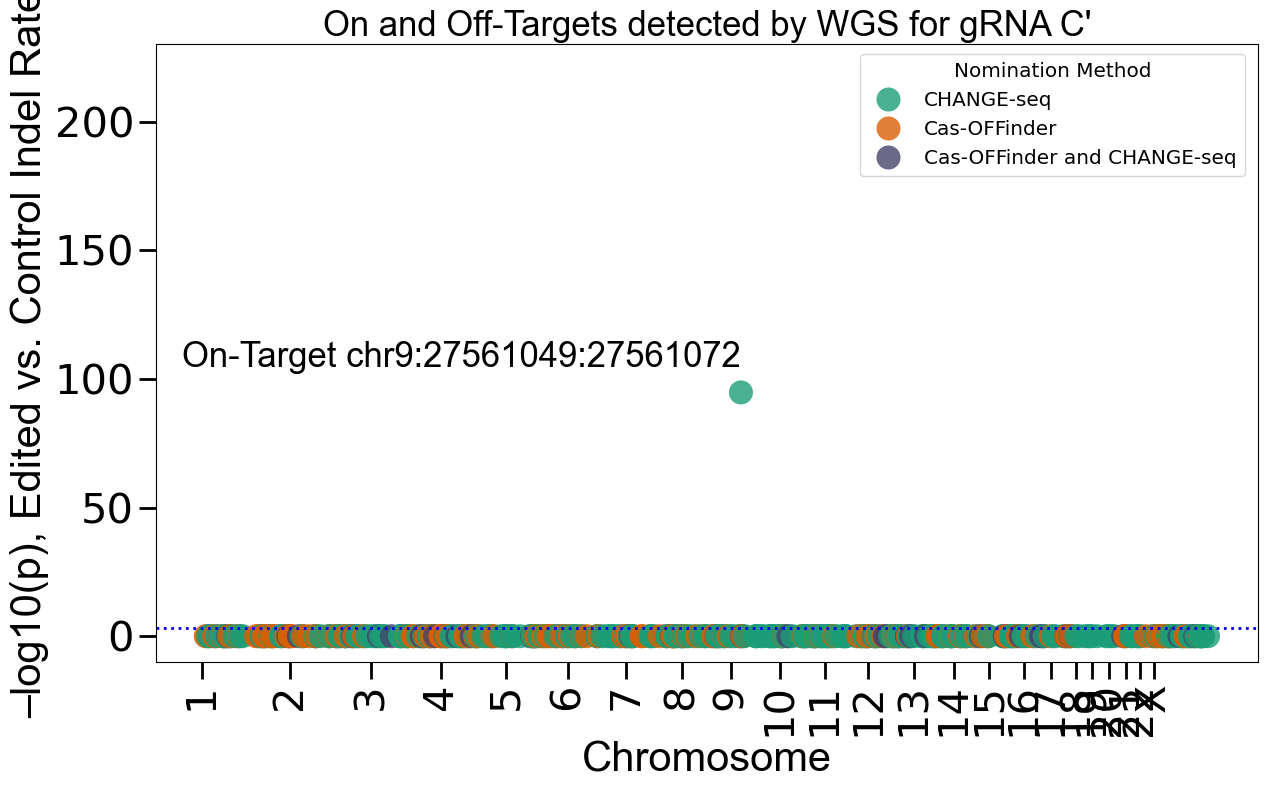

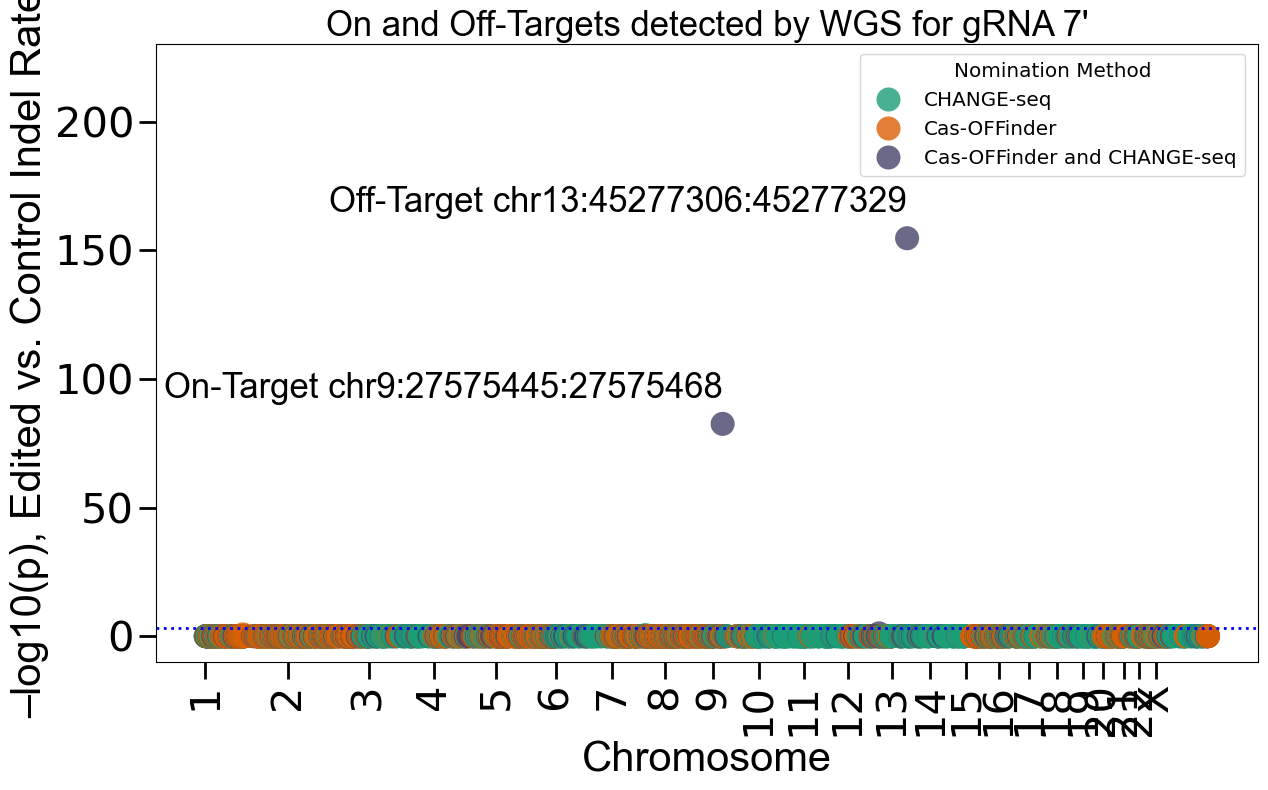

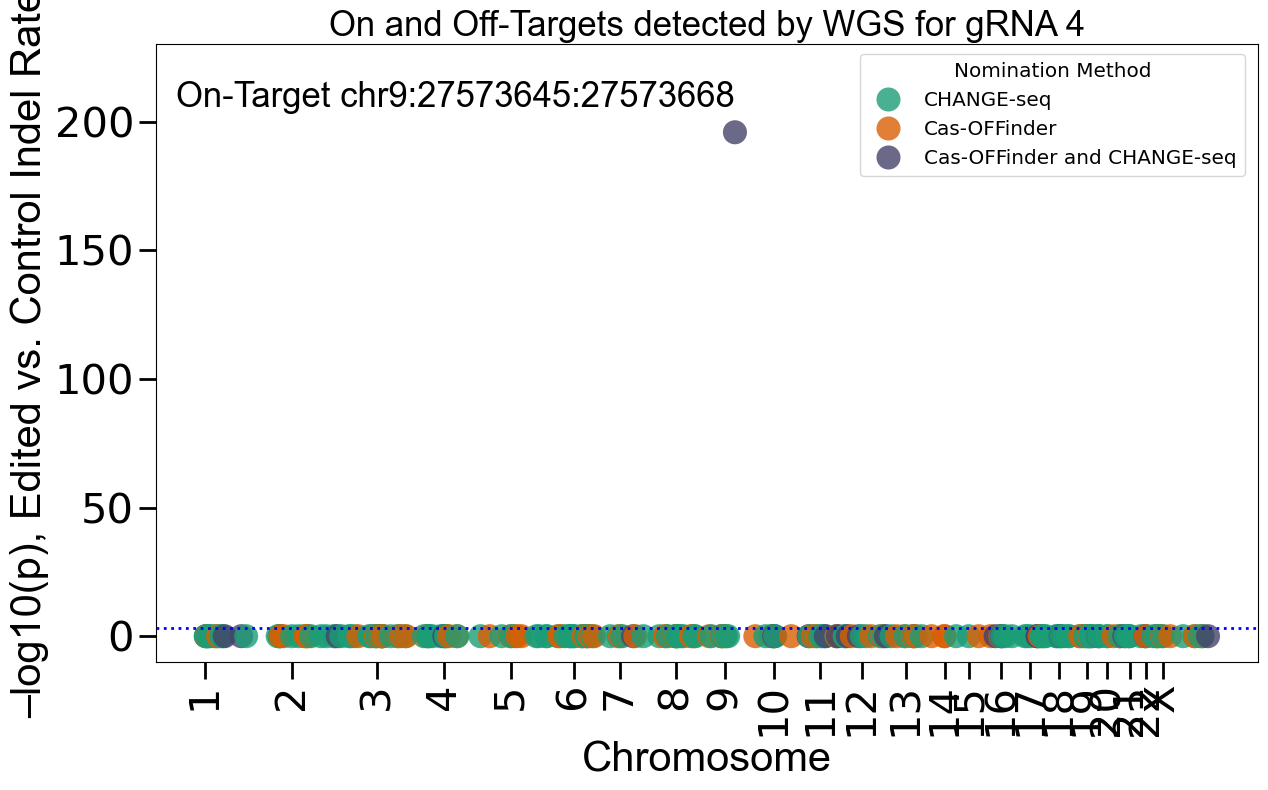

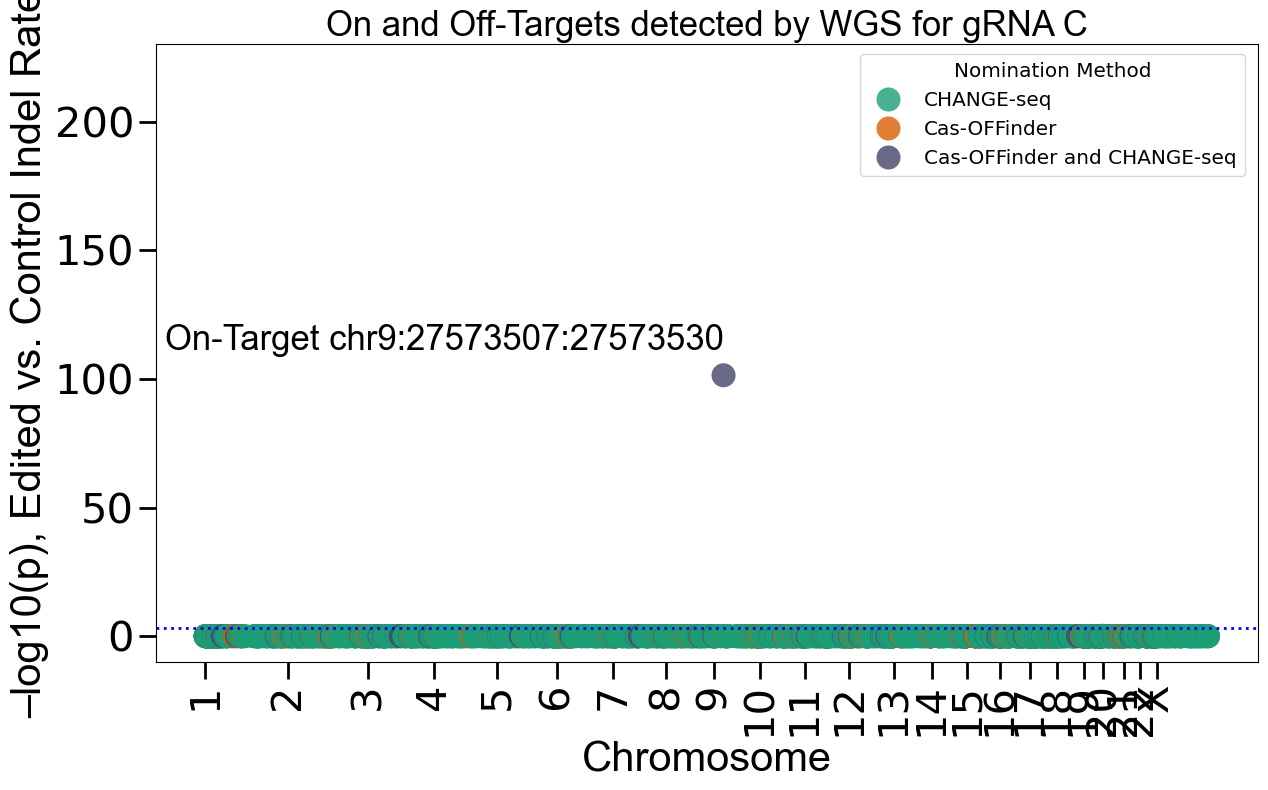

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define alternating black-gray colors
black_gray = ['#000000', '#808080']  # Black and Gray

# # Generate dictionary with alternating colors
# chromosomes = [f'chr{i}' for i in range(1, 23)]
# custom_palette = {chrom: black_gray[i % 2] for i, chrom in enumerate(chromosomes)}
# custom_palette['chrX'] = '#000000'
# custom_palette['chrY'] = '#808080'
# #color based off location


#color based of  what its located in
category = ['CHANGE-seq', 'Cas-OFFinder and CHANGE-seq', 'Cas-OFFinder']
ordered_labels = ['CHANGE-seq', 'Cas-OFFinder', 'Cas-OFFinder and CHANGE-seq']
desired_order = ['CHANGE-seq', 'Cas-OFFinder and CHANGE-seq', 'Cas-OFFinder']
custom_palette = {'CHANGE-seq': '#1b9e77',  'Cas-OFFinder': '#d95f02', 'Cas-OFFinder and CHANGE-seq': '#46436b'}

# Print to verify
print(custom_palette)


#need to modify to include the chromosome X and the chromsome Y
#make the y axis the adjusted p-value instead

count=0
for condition in all_tsvs:
    for replicate in np.arange(0,1):
        # Create the data - select the columns of interest
        data = {
            'chrom': comp_dfs[condition][replicate]['chrom_orig'],
            'category': comp_dfs[condition][replicate]['category'],
            'start': comp_dfs[condition][replicate]['start_orig'],
            'end': comp_dfs[condition][replicate]['end_orig'],
            'p-value': comp_dfs[condition][replicate]['fishers p-values adjusted with benjamini-hochberg']
        }
        
        df = pd.DataFrame(data)
        df['%edited difference'] = comp_dfs[condition][replicate]['edited indel %'] - comp_dfs[condition][replicate]['wt indel %']

        start_offset = []

        # Initialize the dictionary for offsets
        offsets = {}
        
        # Start by initializing the current position
        current_pos = 0
        
        # Iterate through each unique chromosome
        for chrom in df['chrom'].unique():            
            # Get the data for the current chromosome
            chrom_data = df[df['chrom'] == chrom]
            
            # Find the maximum start position for the chromosome (end position)
            chrom_end = chrom_data['start'].max()  # Max position = end position for this chromosome
            
            # Store the offset (end position of the chromosome) in the dictionary
            offsets[chrom] = current_pos  # Offset is the cumulative position
            
            # Update the current position for the next chromosome
            current_pos += chrom_end  # Add the current chromosome's end position to the cumulative position
        
        # Print the offsets dictionary to see the results
        df['offset_start'] = df.apply(lambda row: row['start'] + offsets[row['chrom']], axis=1)
 
        # Transform p-values to -log10(p-value)
        df['-log10 p-value'] = -np.log10(df['p-value'])
        
        # Plot the Manhattan plot
        plt.figure(figsize=(13, 8))
        
        # Create scatter plot and remove edgecolor (no outline for dots)
        sns.scatterplot(data=df, x="offset_start", y="-log10 p-value", hue="category", palette=custom_palette, alpha=0.8, edgecolor='none', s = 300)
            
        # Label the plot
        plt.xlabel("Chromosome", fontsize=30,  fontfamily='Arial')
        plt.ylabel("–log10(p), Edited vs. Control Indel Rate", fontsize=30,  fontfamily='Arial')
        if condition == 'ALT7':
            title_name = "7'"
        if condition == 'ALTC':
            title_name = "C'"
        if condition == 'REXC':
            title_name = "C"
        if condition == 'REX4':
            title_name = '4'
        plt.title('On and Off-Targets detected by WGS for gRNA ' + title_name, fontsize=25,  fontfamily='Arial')
        
        # Customize the X-axis to display chromosomes properly (and adjust spacing if needed)
        chrom_boundaries = []
        chrom_labels = []
        
        # Track the cumulative position for each chromosome
        current_pos = 0
        for chrom in df['chrom'].unique():
            chrom_data = df[df['chrom'] == chrom]
            chrom_end = chrom_data['start'].max()  # Get the max position for the chromosome
            chrom_boundaries.append(current_pos)  # Add the offset
            chrom_labels.append(chrom)  # Add the chrom label
            current_pos += chrom_end  # Update current position

        #find which points are signficant
        significant_df = df[df['p-value'] < 0.05]
        
        # Label significant points
        for _, row in significant_df.iterrows():
            if row['chrom'] == 'chr9':
                plt.text(row['offset_start'] - 10, row['-log10 p-value'] + 10, 
                     f"On-Target {row['chrom']}:{int(row['start'])}:{int(row['end'])}", fontsize=25, ha='right', color='black',  fontfamily='Arial')
            else:
                 plt.text(row['offset_start'] - 10, row['-log10 p-value'] + 10, 
                     f"Off-Target {row['chrom']}:{int(row['start'])}:{int(row['end'])}", fontsize=25, ha='right', color='black',  fontfamily='Arial')

        # Set custom x-ticks based on chromosome boundaries
        plt.tick_params(axis='x', width=2)
        plt.tick_params(axis='y', width=2)
        plt.xticks(ticks=chrom_boundaries, labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'X'], rotation=90,fontsize=30)
        plt.tick_params(axis='x', length=12)
        plt.tick_params(axis='y', length=12)
        plt.yticks(fontsize=30)

        
        # Add a legend to indicate the chromosomes
        handles, labels = plt.gca().get_legend_handles_labels()
        label_to_handle = dict(zip(labels, handles))
        
        ordered_labels = ['CHANGE-seq', 'Cas-OFFinder', 'Cas-OFFinder and CHANGE-seq']
        ordered_handles = [label_to_handle[label] for label in ordered_labels if label in label_to_handle]
        
        legend = plt.legend(ordered_handles, ordered_labels, title="Nomination Method", bbox_to_anchor=(0.63, 1), loc='upper left', fontsize='x-large')
        legend.get_title().set_fontsize('x-large') 

        plt.ylim(-10,230)
            
        # Show the plot
        count += 1
        plt.axhline(y=3, color='blue', linestyle=':', linewidth=2)
        plt.tight_layout()
        # Increment the count
        
        # Save the plot with the count in the filename
        plt.savefig(f"Final_Plot_new_again{count}.svg", format='svg')  # <-- Use f-string to evaluate count
        plt.show()


In [31]:
output_dir = "filtered_tables"
os.makedirs(output_dir, exist_ok=True)

excel_path = os.path.join(output_dir, "WGS_pvalues_fishers_2_replicates_result.xlsx")


#produce the final tables that contain only all the columns of interest
cats = {'ALTC': 'grna_c_prime', 'ALT7':'grna_7_prime', 'REX4': 'grna_4', 'REXC':'grna_c'}
with pd.ExcelWriter(excel_path, engine="openpyxl") as writer:
    for condition in all_tsvs:
        for replicate in np.arange(0, 1):
            df = comp_dfs[condition][replicate].copy()
            
            #irrelevant columns to drop for final table
            cols_to_drop = ['adjusted indel p-value',
                            'combined indel p-value', 'combined_edited_reads', 'combined_wt_reads',
                            'combined edited indel %', 'combined wt indel %', 
                            'combined_edited_reads_w_indels', 
                            'combined_wt_reads_w_indels', 
                            'raw_p_values',  'Unnamed: 0', 'REGION',
                            'combined adjusted indel p-value', 'adjusted_raw_p_values', 
                            'fishers combined indel %', 'chrom_orig', 'start_orig', 'end_orig', 'trial']
            df.drop([c for c in cols_to_drop if c in df.columns], axis=1, inplace=True)

            # Sheet name: e.g., "cond1_rep0"
            sheet_name = f"{cats[condition]}"[:31]  # Excel limit = 31 chars
            df.to_excel(writer, sheet_name=sheet_name, index=False)
